# SIMPLE LINEAR REGRESSION

## Understanding the data

In [3]:
import pandas as pd

In [4]:
#  Reading csv file
df=pd.read_csv(r'C:\Users\Admin\Downloads\tvmarketing.csv')
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [5]:
# Display the first 5 rows
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
# Display the last 5 rows
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [7]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
# Check the shape of the dataframe(rows,columns)
df.shape

(200, 2)

In [9]:
# Let's look at the ststistical information about the dataframe
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# VISUALISING DATA USING PLOT

<Axes: xlabel='TV', ylabel='Sales'>

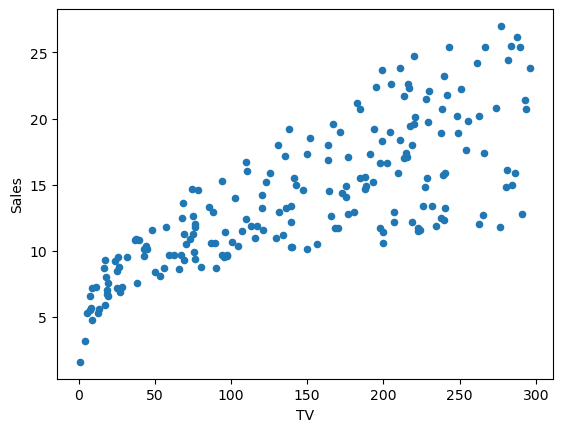

In [10]:
# Visualise the relationship between features and response usin scatter plot
df.plot(x="TV",y="Sales",kind="scatter")

# Preparing x and y

In [11]:
# PUTTING FEATURE VARIABLE TO X
X=df["TV"]
# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [12]:
# PUTTING RFESPONSE VARIABLE TO Y
Y=df["Sales"]
# Print the first 5 rows
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# SPLITTING DATA INTO TRAINING AND TESTING DATA

In [30]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,train_size=0.7, random_state=0000)

In [31]:
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [33]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train=np.array(X_train)[:,np.newaxis]
X_test=np.array(X_test)[:,np.newaxis]

In [34]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


# Performing Linear Regression

In [35]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating linear regression object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train,Y_train)


LinearRegression()

# Coefficient calculation


In [36]:
# Print the intercepts and coefficients
print(lr.intercept_)
print(lr.coef_)

7.31081016541168
[0.04581434]


# Predictions

In [37]:
# Making predictions on the testing set
Y_pred=lr.predict(X_test)

In [38]:
type(Y_pred)

numpy.ndarray

In [39]:
Y_test.shape # cheek the shape to generate the index for plot

(60,)

Text(0, 0.5, 'Sales')

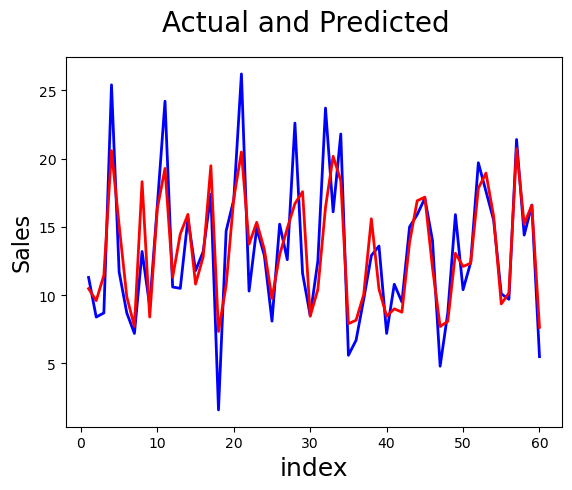

In [40]:
# Actual v/s Predicted
import matplotlib.pyplot as plt
c=[i for i in range(1,61,1)]   #generating index
fig=plt.figure()
plt.plot(c,Y_test,color="blue",linewidth=2,linestyle="-")
plt.plot(c,Y_pred,color="red",linewidth=2,linestyle="-")
fig.suptitle('Actual and Predicted',fontsize=20)         #plot heading
plt.xlabel('index',fontsize=18)         # X label
plt.ylabel('Sales',fontsize=16)         # Y label

Text(0, 0.5, 'Ytest-Ypred')

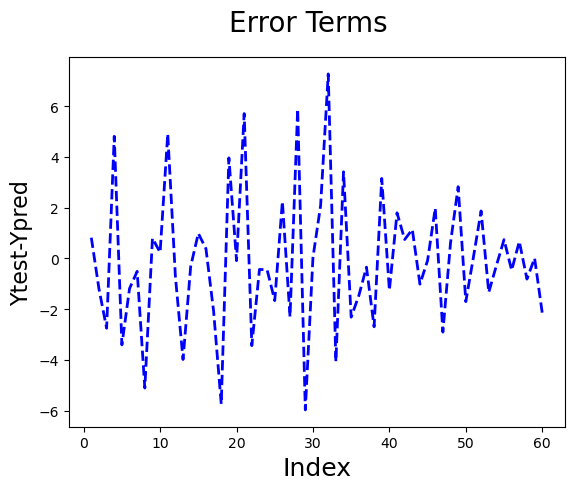

In [41]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2, linestyle="--")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Ytest-Ypred', fontsize=16)                # Y-label

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y_test,Y_pred)

In [43]:
r_squared = r2_score(Y_test,Y_pred)

In [44]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


In [45]:
# this mse =7.9 means that this model is not able to match the 7.9 percent of the values
# r2 means that your model is 72% is accurate on test data .

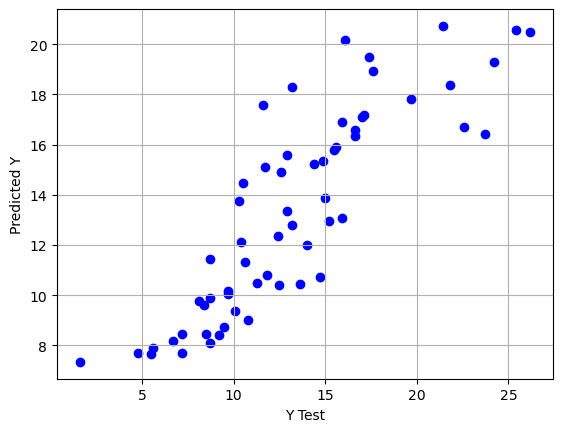

In [46]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
